                                       Medical Cost Personal Insurance Project
Project Description:
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns:                                            
    •	age: age of primary beneficiary
    •	sex: insurance contractor gender, female, male
    •	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,   objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
    •	children: Number of children covered by health insurance / Number of dependents
    •	smoker: Smoking
    •	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    •	charges: Individual medical costs billed by health insurance


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  roc_curve,roc_auc_score,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
ins=pd.read_csv(r'C:\Users\HP\Desktop\DSData-master\medical_cost_insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


the dataset contains both numerical data and categorical data. charges is the target variable and it is a continuous data, so we go with regression problem to predict the accurate charges.

In [3]:
#finding the shape of the data.
ins.shape

(1338, 7)

In [4]:
ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Exploratory data analysis

In [5]:
#finding null values presented?
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values presented in the given data.

In [6]:
ins.columns
ins.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

There are 7 columns presented in the given data out of which 6 features and one ('charges')label.

In [7]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In this data we have 3 object type, 2 float type and 2 int type data. now we are going to convert the object data to numberical 

In [8]:
#display the information of dataset.
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no null values and 3 datatypes presented also memory usage is given.

<AxesSubplot:>

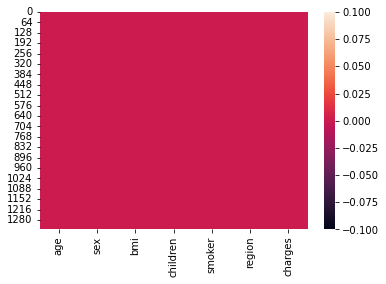

In [9]:
#plotting heatmap.
sns.heatmap(ins.isnull())

it is clear that there is no null values presented in the dataset.

In [10]:
ins['region'].value_counts()



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
ins['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
#converting categorical data into numerical data
ins_data={'sex':{'male':0,'female':1},
          'smoker':{'yes':1,'no':0},
          'region':{'southeast':1,'southwest':2,'northwest':3,'northeast':4}
         }
ins_cost=ins.copy()
ins_cost.replace(ins_data, inplace=True)

In [14]:
ins_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


now the dataset is completely numerical.


In [15]:

ins_cost.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


By the describe method the following assumptions were made:
1. The count value in all coulmns are same, so there is no null values.
2. The mean is greater than 50% of median in all columns so there will be right skewness
3. we also have std, min, 25%, 50%, 75% and max values from these method.

Data Visualization

Bi-variate analysis

<AxesSubplot:xlabel='region', ylabel='charges'>

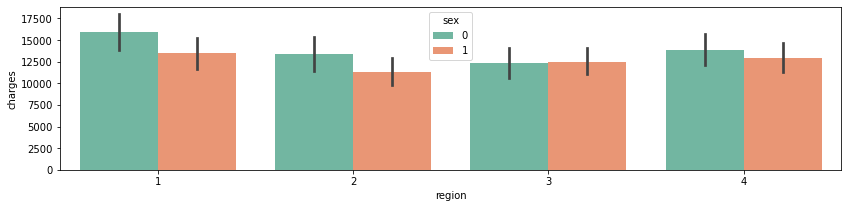

In [16]:
#relationship between region and charges
plt.figure(figsize=(14,3))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = ins_cost, palette = 'Set2')

as we can see there is charges are varying from one region to another region.

<AxesSubplot:xlabel='age', ylabel='charges'>

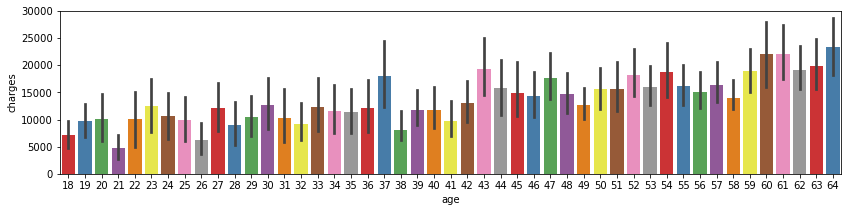

In [17]:
#relationship between age and charges
plt.figure(figsize=(14,3))
sns.barplot(x = 'age', y = 'charges', data = ins_cost, palette = 'Set1')

The charges are low when the age is low and the charges are high when the age is increased.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

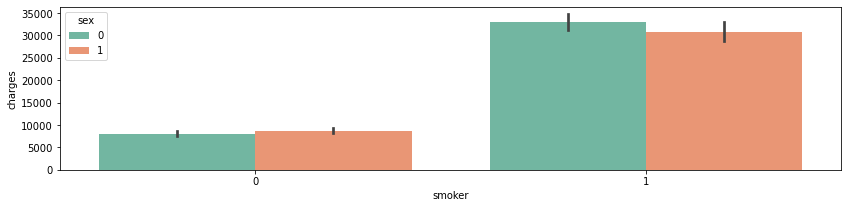

In [18]:
#relationship between sex and charges
plt.figure(figsize=(14,3))
sns.barplot(x = 'smoker', y = 'charges', hue = 'sex', data = ins_cost, palette = 'Set2')

In [19]:
Huge difference is there between smoker and non+smoker person. 

SyntaxError: invalid syntax (2715331896.py, line 1)

<AxesSubplot:xlabel='region', ylabel='charges'>

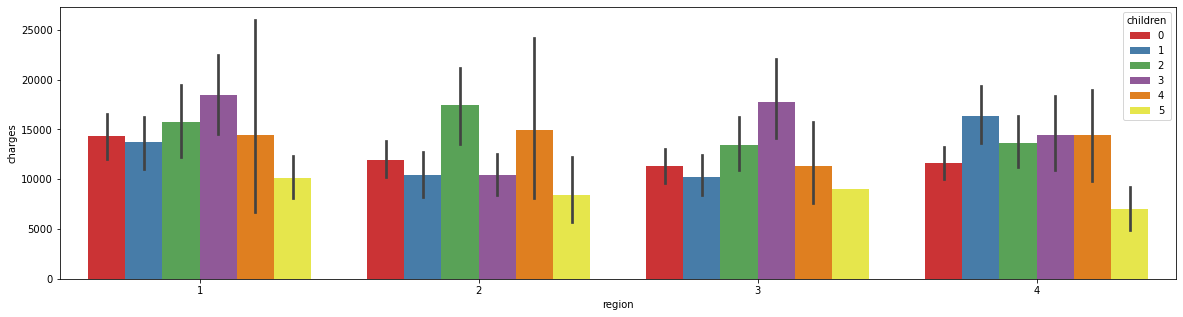

In [20]:
#relationship between region and charges
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'children', data = ins_cost, palette = 'Set1')

<AxesSubplot:xlabel='children', ylabel='charges'>

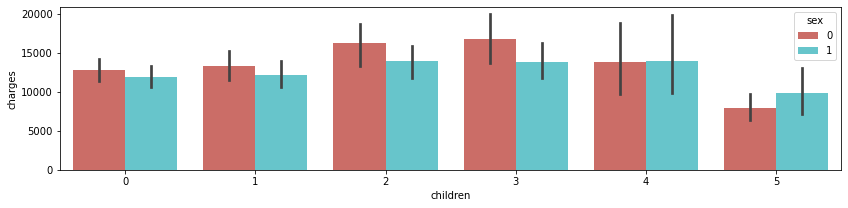

In [21]:
#relationship between children and charges
plt.figure(figsize=(14,3))
sns.barplot(x = 'children', y = 'charges', hue = 'sex', data = ins_cost, palette = 'hls')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

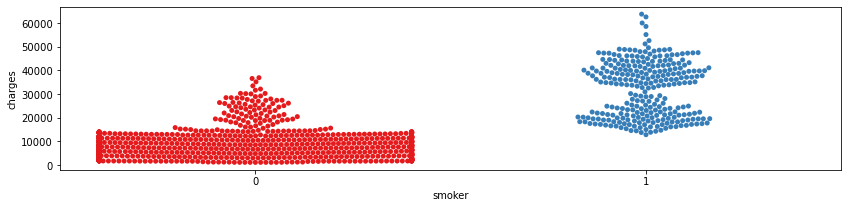

In [22]:
#relationship between smoker and charges
plt.figure(figsize=(14,3))
sns.swarmplot(x = 'smoker', y = 'charges',  data = ins_cost, palette = 'Set1')

as we can see that smoker has strong relationship with charges

<AxesSubplot:xlabel='region', ylabel='charges'>

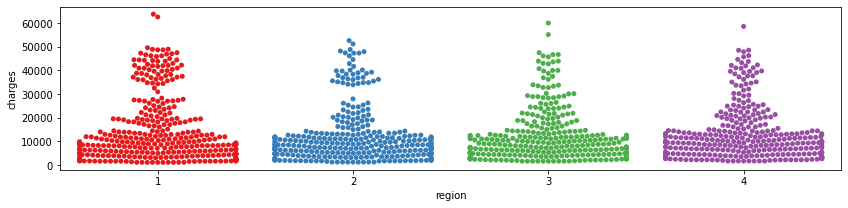

In [23]:
#relationship between region and charges
plt.figure(figsize=(14,3))
sns.swarmplot(x = 'region', y = 'charges',  data = ins_cost, palette = 'Set1')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

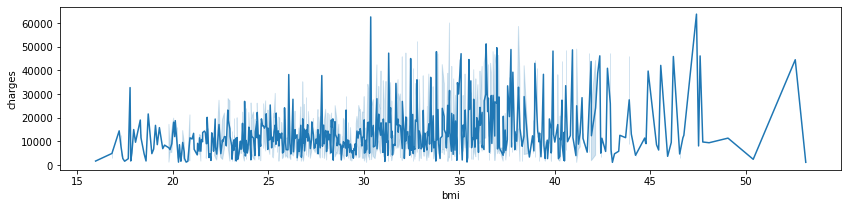

In [24]:
#relationship between bmi and charges
plt.figure(figsize=(14,3))
sns.lineplot(x = 'bmi', y = 'charges',  data = ins_cost, palette = 'Set1')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

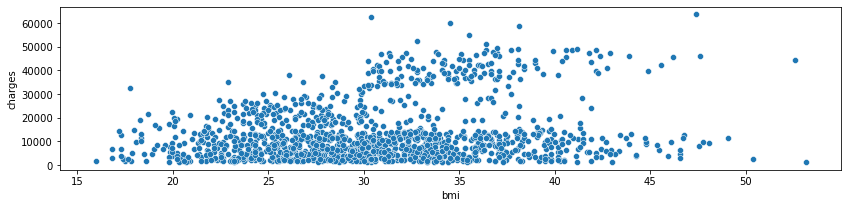

In [25]:
#relationship between bmi and charges
plt.figure(figsize=(14,3))
sns.scatterplot(x = 'bmi', y = 'charges',  data = ins_cost, palette = 'Set1')

<Figure size 1008x216 with 0 Axes>

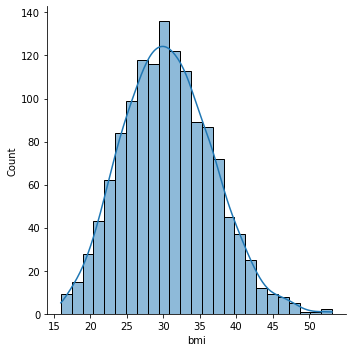

In [26]:
#distribution for bmi
plt.figure(figsize=(14,3))
sns.displot(data=ins_cost, x="bmi", kde=True)

<Figure size 1008x216 with 0 Axes>

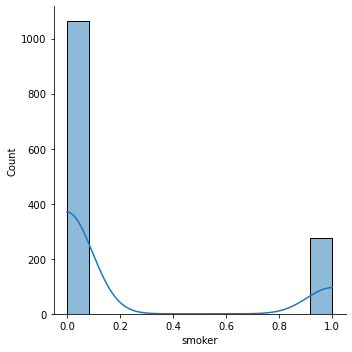

In [27]:
#distribution for smoker
plt.figure(figsize=(14,3))
sns.displot(data=ins_cost, x="smoker", kde=True)

<Figure size 864x432 with 0 Axes>

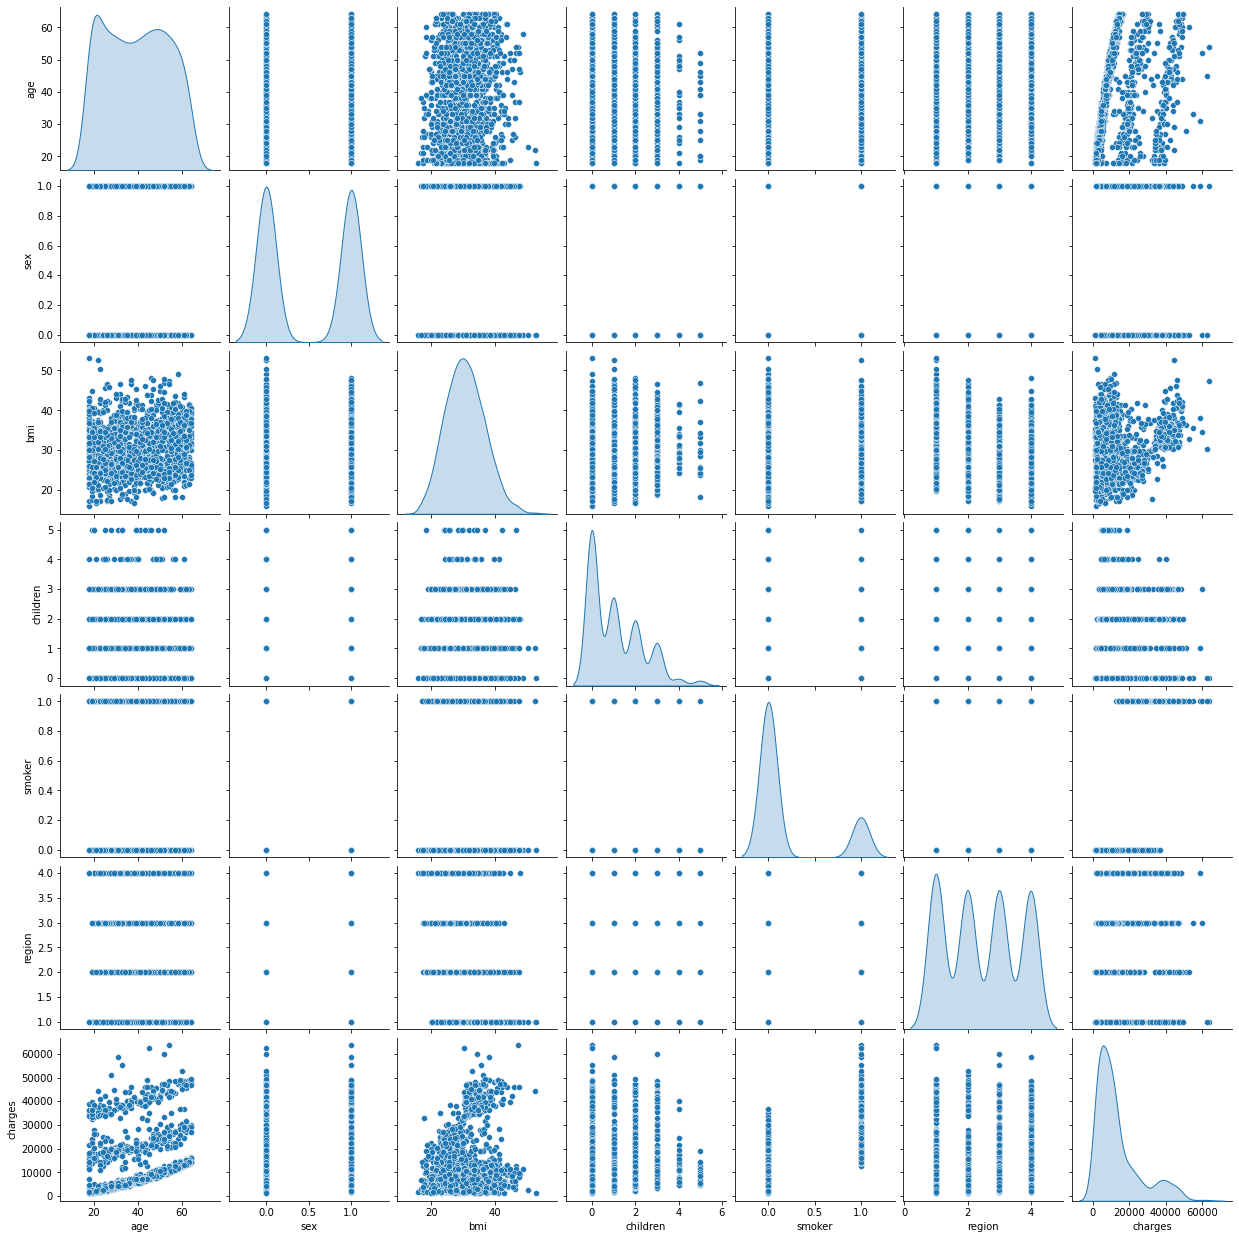

In [28]:
#pair plot of total dataset
plt.figure(figsize=(12,6), facecolor='orange')
sns.pairplot(ins_cost, diag_kind = 'kde')
plt.show()

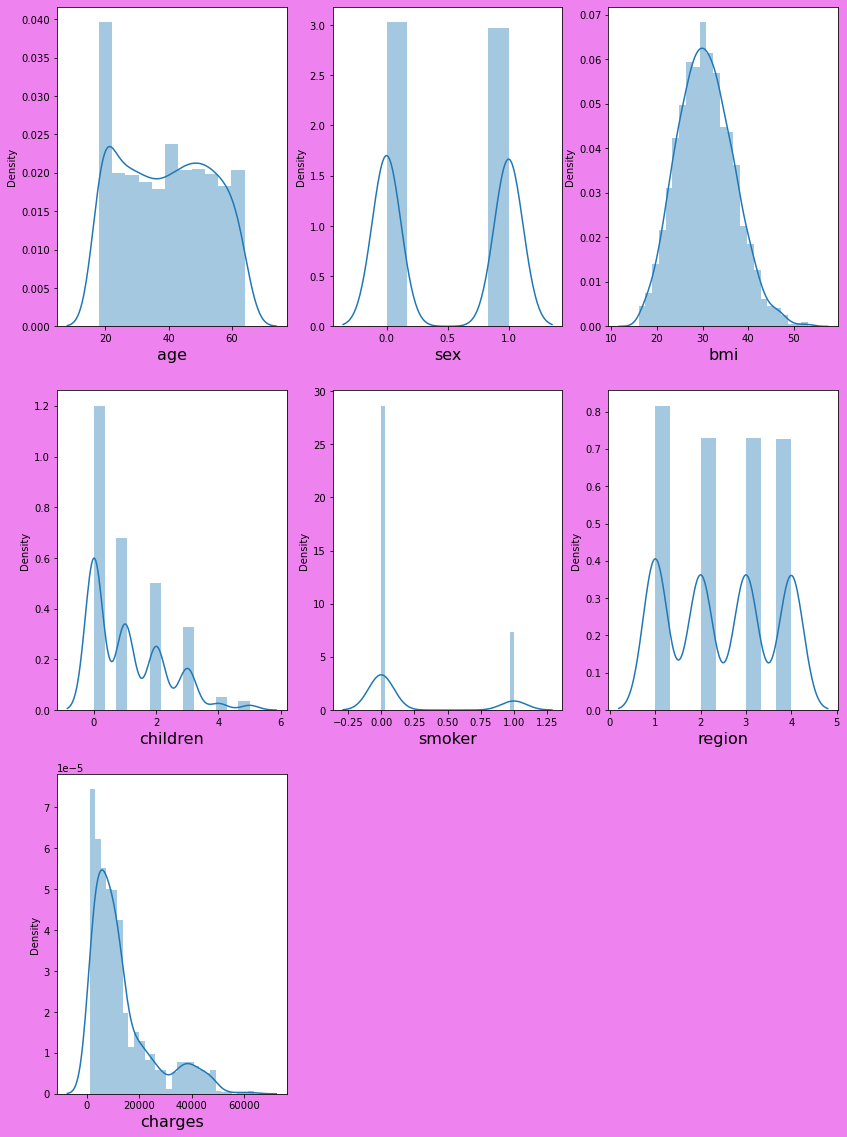

In [29]:
plt.figure(figsize=(14,20),facecolor="violet")
plotnumber=1
for columns in ins_cost:
    if plotnumber<=7:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(ins_cost[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

from the above analysis there might be outliers in the bmi, children, smoker and charges columns. since, charges is the target variable we will neglected. for further conformation i am taking box plot.

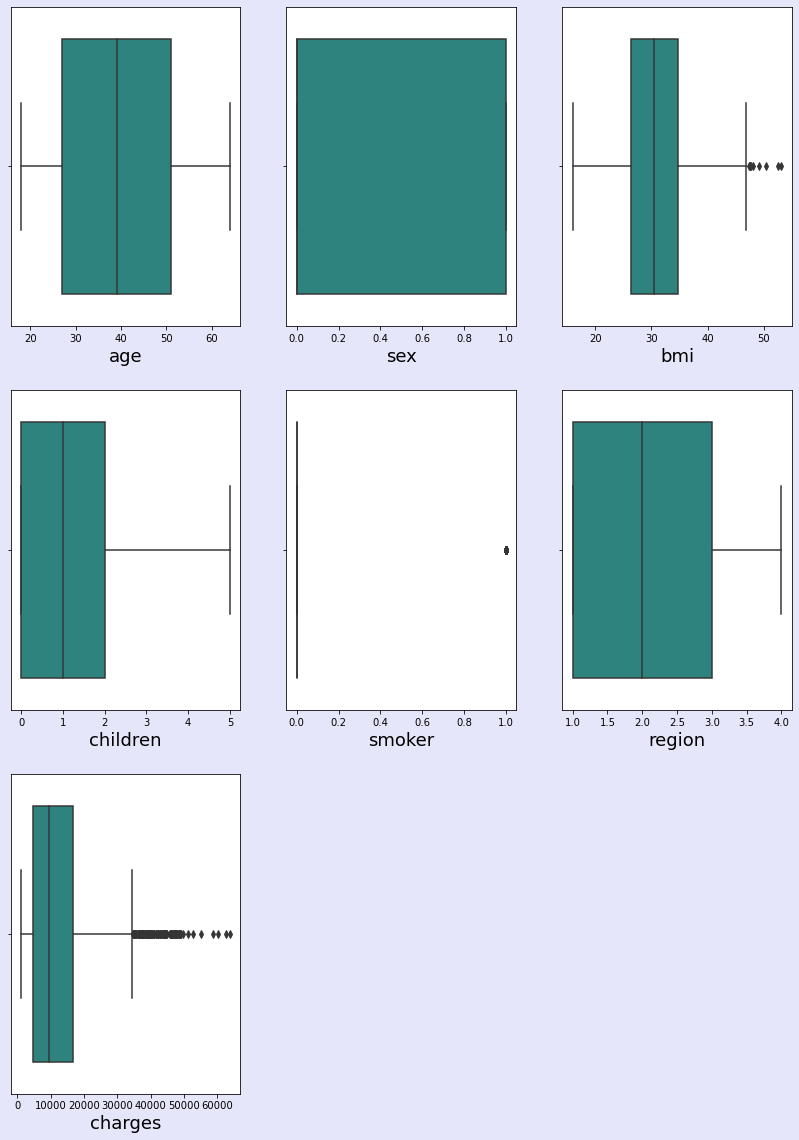

In [30]:
plt.figure(figsize=(14,20), facecolor="lavender")
plotnumber=1
for column in ins_cost:
    if plotnumber<=7:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(ins_cost[column], palette="viridis")
        plt.xlabel(column, fontsize=18)
        plt.yticks(rotation=0, fontsize=16)
    plotnumber+=1
plt.show()

yes, there are outliers in the bmi and smoker i am trying to fix it.

In [31]:
ins_cost['bmi']=ins_cost['bmi'].replace(0,ins_cost['bmi'].mean())


In [32]:
q1=ins_cost.quantile(0.25)
q3=ins_cost.quantile(0.75)
iqr=q3-q1

In [33]:
BMI_high=q3.bmi+1.5*iqr.bmi
BMI_high

index=np.where(ins_cost['bmi']>BMI_high)


ins_cost=ins_cost.drop(ins_cost.index[index])
ins_cost.shape

ins_cost.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,1,27.900,0,1,2,16884.92400
1,1,18,0,33.770,1,0,1,1725.55230
2,2,28,0,33.000,3,0,1,4449.46200
3,3,33,0,22.705,0,0,3,21984.47061
4,4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,0,30.970,3,0,3,10600.54830
1325,1334,18,1,31.920,0,0,4,2205.98080
1326,1335,18,1,36.850,0,0,1,1629.83350
1327,1336,21,1,25.800,0,0,2,2007.94500


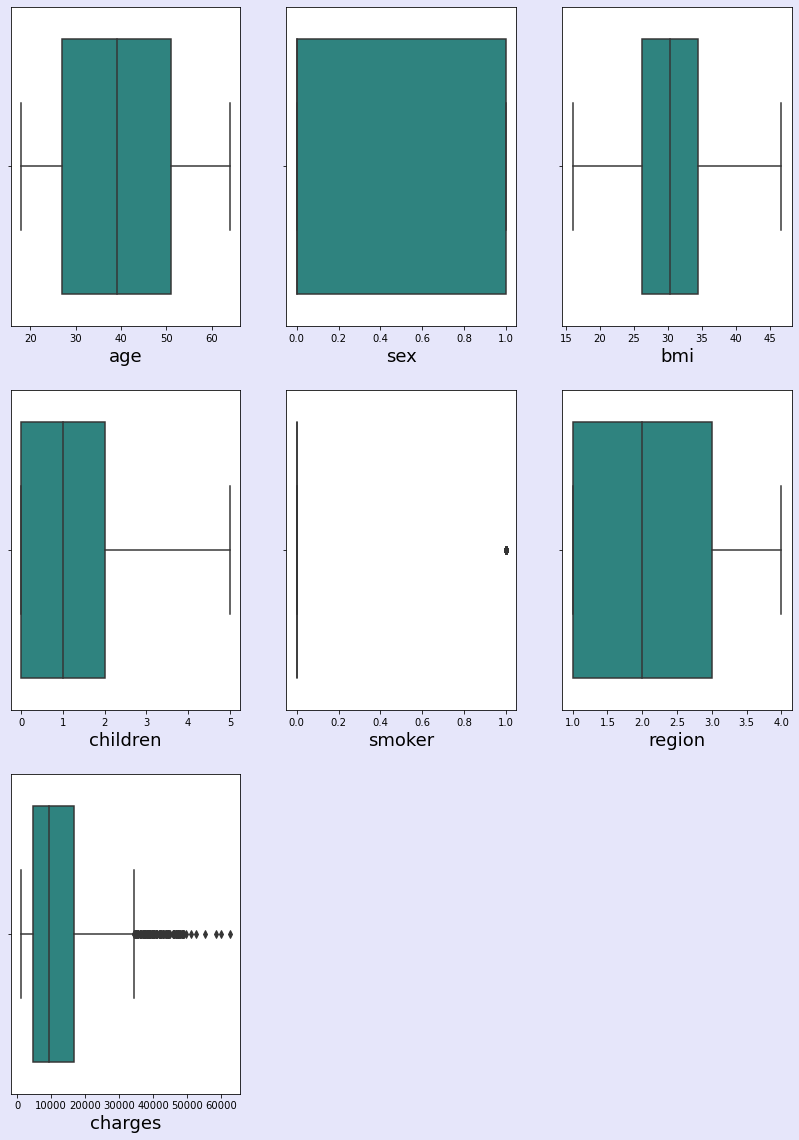

In [34]:
plt.figure(figsize=(14,20), facecolor="lavender")
plotnumber=1
for column in ins_cost:
    if plotnumber<=7:
    
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(ins_cost[column], palette="viridis")
        plt.xlabel(column, fontsize=18)
        plt.yticks(rotation=0, fontsize=16)
    plotnumber+=1
plt.show()

In [35]:
ins_cost.skew()

age         0.058413
sex         0.016573
bmi         0.157180
children    0.936628
smoker      1.471424
region      0.041035
charges     1.500577
dtype: float64

In [36]:
#corelation b/n features and target variable.
corr=ins_cost.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019143,0.114686,0.043041,-0.024505,0.005787,0.302022
sex,0.019143,1.000000,-0.039958,-0.019281,-0.079854,0.007394,-0.063394
bmi,0.114686,-0.039958,1.000000,0.017355,-0.002871,-0.253166,0.193196
children,0.043041,-0.019281,0.017355,1.000000,0.007577,-0.002285,0.069739
smoker,-0.024505,-0.079854,-0.002871,0.007577,1.000000,-0.036766,0.785912
region,0.005787,0.007394,-0.253166,-0.002285,-0.036766,1.000000,-0.035093
charges,0.302022,-0.063394,0.193196,0.069739,0.785912,-0.035093,1.000000


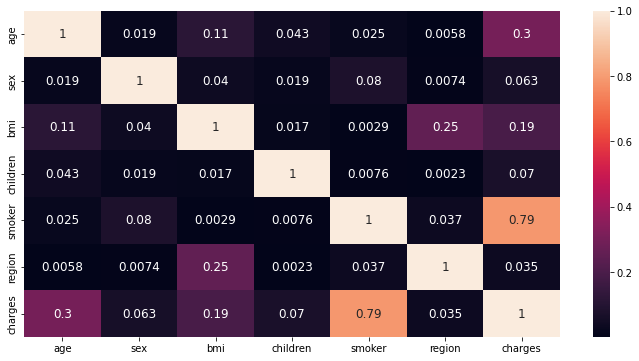

In [37]:
df_corr=ins_cost.corr().abs()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

In [38]:
#fixing features and label

a=ins_cost.drop(columns=['charges'])
b=ins_cost['charges']

In [39]:
scaler=StandardScaler()
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,age,sex,bmi,children,smoker,region
0,-1.438764,1.008311,-0.445670,-0.907940,1.975869,-0.409657
1,-1.509976,-0.991757,0.546267,-0.079764,-0.506106,-1.296356
2,-0.797855,-0.991757,0.416149,1.576587,-0.506106,-1.296356
3,-0.441794,-0.991757,-1.323542,-0.907940,-0.506106,0.477043
4,-0.513006,-0.991757,-0.280065,-0.907940,-0.506106,0.477043
...,...,...,...,...,...,...
1324,0.768813,-0.991757,0.073111,1.576587,-0.506106,0.477043
1325,-1.509976,1.008311,0.233646,-0.907940,-0.506106,1.363743
1326,-1.509976,1.008311,1.066737,-0.907940,-0.506106,-1.296356
1327,-1.296340,1.008311,-0.800536,-0.907940,-0.506106,-0.409657


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.017484,age
1,1.008955,sex
2,1.086355,bmi
3,1.002450,children
4,1.008497,smoker
5,1.071476,region


there is no multicolinearity issues.

modelling

In [41]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=k)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.8138965822053634 at random state is 86


In [42]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=86)

In [43]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))



R2_score: 0.8138965822053634
R2_score on training data: 71.66479201881579
Mean Absolute Error: 4018.4377706747277
Mean Squared Error: 29382190.04627776
Root Mean Squared Error: 5420.534110793674


In [45]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 0.8958976158827766
R2_score on training data: 97.01679592648335
Mean Absolute Error: 2344.681502043422
Mean Squared Error: 16435786.460290464
Root Mean Squared Error: 4054.1073567791054


In [46]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 0.7954639001498087
R2_score on training data: 99.79601720667308
Mean Absolute Error: 2503.622060473684
Mean Squared Error: 32292359.959527634
Root Mean Squared Error: 5682.636708388777


In [47]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))


R2_score: 0.8799387433788924
R2_score on training data: 99.79601720667308
Mean Absolute Error: 2392.2595521077706
Mean Squared Error: 18955388.89634499
Root Mean Squared Error: 4353.778691705056


In [48]:
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: -0.09995415992913292
R2_score on training data: -9.606851073006407
Mean Absolute Error: 8492.960356494492
Mean Squared Error: 173661841.10006723
Root Mean Squared Error: 13178.08184448963


In [49]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 0.8687294634922065
R2_score on training data: 85.01634531042043
Mean Absolute Error: 2860.3892864686713
Mean Squared Error: 20725120.993774638
Root Mean Squared Error: 4552.48514481647


In [50]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 0.9181790865787669
R2_score on training data: 88.49102190717807
Mean Absolute Error: 2149.1568725567367
Mean Squared Error: 12917966.02336228
Root Mean Squared Error: 3594.157206267177


In [51]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 0.8783122284489997
R2_score on training data: 99.39264290533029
Mean Absolute Error: 2604.5800970333453
Mean Squared Error: 19212184.66801616
Root Mean Squared Error: 4383.170618173123


In [52]:
las=Lasso()
las.fit(x_train,y_train)
pred_las=las.predict(x_test)
pred_train=las.predict(x_train)
print('R2_score:',r2_score(y_test,pred_las))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_las))
print('Mean Squared Error:',mean_squared_error(y_test,pred_las))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_las)))


R2_score: 0.8139065949772353
R2_score on training data: 71.66478713641762
Mean Absolute Error: 4018.2798278276396
Mean Squared Error: 29380609.220038712
Root Mean Squared Error: 5420.3882905229875


In [53]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))


R2_score: 0.8138121657060391
R2_score on training data: 71.6646981742851
Mean Absolute Error: 4020.5180363845725
Mean Squared Error: 29395517.805948067
Root Mean Squared Error: 5421.763348390269


Crossvalidation

In [54]:

from sklearn.model_selection import cross_val_score

In [55]:
score=cross_val_score(lr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.76408878 0.70978693 0.77350238 0.72737185 0.75806896]
0.7465637798119849
Difference between R2 score and cross validation score is-  0.06733280239337858


In [56]:
score=cross_val_score(rfr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_rfr)-score.mean() )

[0.84806453 0.77718705 0.86407184 0.82062071 0.84773872]
0.831536569509327
Difference between R2 score and cross validation score is-  0.06436104637344964


In [57]:
score=cross_val_score(Dr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_Dr)-score.mean() )

[0.71992643 0.65137103 0.73880451 0.71946591 0.70877362]
0.7076682993845766
Difference between R2 score and cross validation score is-  0.08779560076523207


In [58]:
score=cross_val_score(tr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_tr)-score.mean() )

[0.83666581 0.74493934 0.84792132 0.80884457 0.84031423]
0.8157370542329391
Difference between R2 score and cross validation score is-  0.06420168914595337


In [59]:
score=cross_val_score(knn, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_knn)-score.mean() )

[0.82766643 0.75981888 0.84219791 0.80399258 0.80330974]
0.8073971087589824
Difference between R2 score and cross validation score is-  0.06133235473322407


In [60]:
score=cross_val_score(sv, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_sv)-score.mean() )

[-0.10939752 -0.11386852 -0.06941736 -0.09748464 -0.10838647]
-0.0997109003900118
Difference between R2 score and cross validation score is-  -0.00024325953912111842


In [61]:
score=cross_val_score(gb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_gb)-score.mean() )

[0.87256508 0.79480429 0.88827397 0.84623117 0.86040628]
0.852456156182759
Difference between R2 score and cross validation score is-  0.06572293039600785


In [62]:
score=cross_val_score(xgb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_xgb)-score.mean() )

[0.80019841 0.71485862 0.84972077 0.7996077  0.83032059]
0.7989412159451609
Difference between R2 score and cross validation score is-  0.07937101250383882


In [63]:
score=cross_val_score(las, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_las)-score.mean() )

[0.76408893 0.70982176 0.77348609 0.72737663 0.75806905]
0.7465684932309173
Difference between R2 score and cross validation score is-  0.06733810174631794


In [64]:
score=cross_val_score(rd, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_rd)-score.mean() )

[0.7640805  0.70989295 0.7734049  0.72743561 0.75802989]
0.7465687694511914
Difference between R2 score and cross validation score is-  0.06724339625484765


comparing all methods the crossvalidation score is very less in KNN, so i have choosen kNeighborsRegressor model whose r2 score is 0.86. Now i am trying to increase my test result by using hyperparameter tuning.

Hyperparameter tuning

In [65]:
#GridSearchCV
grid_param={
    'n_neighbors':[5,7,9,11,12],
    'weights': ["uniform","distance"],
    'metric':["minkowski"],
    'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
    'leaf_size': [30,34,37,39,42,47]
}
    


In [66]:

grid_search=GridSearchCV(knn, grid_param, verbose=3)
                        

In [67]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.735 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.841 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.739 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.683 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 34, 37, 39, 42, 47],
                         'metric': ['minkowski'],
                         'n_neighbors': [5, 7, 9, 11, 12],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [68]:
grid_search.best_params_

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 12,
 'weights': 'distance'}

In [73]:
knn=KNN(algorithm='brute',leaf_size=31, metric='minkowski',n_neighbors=12,weights='distance')

In [74]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=31, n_neighbors=12,
                    weights='distance')

In [75]:
knn.score(x_test,y_test)

0.880869597043579

In [76]:
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.880869597043579
Mean Absolute Error: 2725.5325001422
Mean Squared Error: 18808424.807210017
Root Mean Squared Error: 4336.868087365584


Finally, the test score for this model is increased using GridSearchCV.

In [79]:

import pickle
filename='medical cost insurance'
pickle.dump(knn, open(filename,'wb'))


In [80]:
import pickle
loaded_model=pickle.load(open('medical cost insurance','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.08695970435791


In [82]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
original,7938.754952,42027.572697,19730.697608,41782.6528,7969.732533,27479.849906,16022.554602,7062.177448,5267.459691,12600.387157,...,23211.384414,12498.677711,12446.088453,41056.31803,5381.98235,5310.832876,5411.764465,28123.2997,42706.557805,13781.782629
predicted,4005.422500,46889.261200,19023.260000,40419.0191,6079.671500,20773.627750,12646.207000,18157.876000,7323.734819,10560.491700,...,17178.682400,13462.520000,12233.828000,44400.40640,4931.64700,3260.199000,5488.262000,27037.9141,43896.376300,11987.168200
